- **full Name:** benmadi imed-eddine
- **Neptun code:** DXU35B
- **Kaggle notebook:** https://www.kaggle.com/code/imedbenmadi/itds-practise-project
- **github repositry:** https://github.com/imadbenmadi/ITDS-practise-project

# World War II Weather Data Analysis


#### **about the dataset**
The dataset contains daily information on weather conditions collected during the World War II, start-
ing from 1940-01-01 until 1945-12-31. The data has been collected by 159 weather stations located all
around the world for a total of 119040 recordings.

**link : [Kaggle](https://www.kaggle.com/datasets/smid80/weatherww2)**


**The fields that are useful for this laboratory are:**

1. **STA**: ID of the weather station
2. **Date**: The date of the recording
3. **MaxTemp**: Daily maximum temperature recorded (°C)
4. **MinTemp**: Daily minimum temperature recorded (°C)
5. **MeanTemp**: daily mean temperature in degree Celsius




**For simplicity we will work only with the data collected by the sensor identified by the id: 22508. This sensor is located at {Lat:21.48333333, Lon:-158.05}, corresponding to the Honolulu Hawaii island**

![image.png](./images/intro.png)


* **Univariate analytical functions** = functions with **1 input variable**, like $y = \sin(x)$ or $y = x^2$
* **Multivariate synthetic dataset** = **fake data** with **multiple input variables**, like $y = 3x_1 + 2x_2$



**In this laboratory we have to build a regression model for several analytical functions as well as for a structured dataset generated with scikit-learn.**

## 1. Import Required Libraries

In [414]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Geospatial analysis
import folium
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd

# Machine learning and statistical analysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## 2. Data Loading and Exploration


In [415]:
# Load the dataset
try:
    # Try to load the data
    df = pd.read_csv('./weatherww2/weatherww2/SummaryofWeather.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("If the dataset haven't been downloaded yet, please obtain it from Kaggle or appropriate source.")


Data loaded successfully!


C:\Users\imadb\AppData\Local\Temp\ipykernel_18928\2951252193.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./weatherww2/weatherww2/SummaryofWeather.csv')


In [416]:
# # Load the dataset
# try:
#     # Try to load the data
#     df = pd.read_csv('./weatherww2/weatherww2/SummaryofWeather.csv')
#     print("Data loaded successfully!")
# except Exception as e:
#     print(f"Error loading data: {e}")
#     print("If the dataset  haven't been downloaded  yet, please obtain it from Kaggle or appropriate source.")
#     # Create sample data for demonstration if file not found
#     print("Creating sample data for demonstration...")
    
#     # Generate sample dates during WWII (1940-1945)
#     dates = pd.date_range(start='1940-01-01', end='1945-12-31', freq='D')
    
#     # Creating sample data
#     np.random.seed(42)  # For reproducibility
#     n_samples = len(dates)
    
#     # Sample locations in Europe
#     locations = [
#         ('London', 51.5074, -0.1278),
#         ('Berlin', 52.5200, 13.4050),
#         ('Paris', 48.8566, 2.3522),
#         ('Warsaw', 52.2297, 21.0122),
#         ('Moscow', 55.7558, 37.6173)
#     ]
    
#     # Create sample dataframe
#     sample_data = []
    
#     for date in dates:
#         for name, lat, lon in locations:
#             # Generate random weather data with seasonal patterns
#             month = date.month
#             seasonal_temp = 15 + 10 * np.sin((month - 1) * np.pi / 6)  # Temperature varies seasonally
            
#             temp_c = seasonal_temp + np.random.normal(0, 3)  # Add noise
#             pressure_mb = 1013 + np.random.normal(0, 5)  # Normal pressure with noise
#             humidity_pct = 60 + np.random.normal(0, 15)  # Humidity with noise
#             wind_speed_kmh = 10 + np.random.exponential(5)  # Wind speed
            
#             # Create weather condition
#             conditions = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog']
#             probabilities = [0.4, 0.3, 0.15, 0.1, 0.05]
#             condition = np.random.choice(conditions, p=probabilities)
            
#             # Adjust for winter months
#             if month in [12, 1, 2]:
#                 temp_c -= 10
#                 if temp_c < 0 and np.random.random() < 0.4:
#                     condition = 'Snow'
            
#             sample_data.append({
#                 'date': date.strftime('%Y-%m-%d'),
#                 'time': f"{np.random.randint(0, 24):02d}:00",
#                 'location': name,
#                 'latitude': lat,
#                 'longitude': lon,
#                 'temperature_celsius': round(temp_c, 1),
#                 'pressure_mb': round(pressure_mb, 1),
#                 'humidity_percent': min(max(0, round(humidity_pct, 1)), 100),
#                 'wind_speed_kmh': round(wind_speed_kmh, 1),
#                 'weather_condition': condition
#             })
    
#     df = pd.DataFrame(sample_data)

In [417]:
# Display the first few rows of the dataset
df.head()


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [419]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


**we can see that there are a lot of missing value , which may apear a lot especially is time series data like this one**

In [420]:
# Generate descriptive statistics
df.describe().round(2)

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.00,532.00,119040.00,119040.00,119040.00,119040.00,119040.00,119040.00,533.00,532.00,...,0.0,0.0,0.0,0.0,525.00,0.0,0.0,0.0,0.0,0.0
mean,29659.44,37.77,27.05,17.79,22.41,43.81,6.73,15.80,27.00,20.40,...,NaN,NaN,NaN,NaN,12.09,NaN,NaN,NaN,NaN,NaN
std,20953.21,10.30,8.72,8.33,8.30,1.14,3.43,8.79,15.22,5.56,...,NaN,NaN,NaN,NaN,5.73,NaN,NaN,NaN,NaN,NaN
min,10001.00,18.52,-33.33,-38.33,-35.56,40.00,1.00,1.00,2.00,10.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
25%,11801.00,29.63,25.56,15.00,20.56,43.00,4.00,8.00,11.00,16.00,...,NaN,NaN,NaN,NaN,8.50,NaN,NaN,NaN,NaN,NaN
50%,22508.00,37.04,29.44,21.11,25.56,44.00,7.00,16.00,32.00,20.00,...,NaN,NaN,NaN,NaN,11.60,NaN,NaN,NaN,NaN,NaN
75%,33501.00,43.06,31.67,23.33,27.22,45.00,10.00,23.00,34.00,23.25,...,NaN,NaN,NaN,NaN,15.00,NaN,NaN,NaN,NaN,NaN
max,82506.00,75.93,50.00,34.44,40.00,45.00,12.00,31.00,78.00,41.00,...,NaN,NaN,NaN,NaN,23.90,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning and Preprocessing



In [421]:
# Filter for station ID 22508 (Honolulu, Hawaii)
if 'STA' in df.columns:
    station_id = 22508
    df = df[df['STA'] == station_id]
    print(f"Filtered data for station ID: {station_id}")


Filtered data for station ID: 22508


In [422]:
df["Date"].isnull().sum()

0

In [423]:
# since the Date column is not in datetime format, we need to convert it
# we know that there is no null values in the Date column based on the previous cell



# Check if 'Date' column exists and create a datetime column
if 'Date' in df.columns:
    df['datetime'] = pd.to_datetime(df['Date'])
    print("Created datetime column")
else:
    print("Error: Required date column not found in dataset")
    print("Available columns:", df.columns.tolist())


'''
    example of how to create a datetime column from a date column will look like this:
    value of the date column : 2023-10-01
    final value of the datetime column : 2023-10-01 00:00:00
'''


Created datetime column


'\n    example of how to create a datetime column from a date column will look like this:\n    value of the date column : 2023-10-01\n    final value of the datetime column : 2023-10-01 00:00:00\n'

In [424]:
df['datetime'] 

57877   1940-01-01
57878   1940-01-02
57879   1940-01-03
57880   1940-01-04
57881   1940-01-05
           ...    
60064   1945-12-27
60065   1945-12-28
60066   1945-12-29
60067   1945-12-30
60068   1945-12-31
Name: datetime, Length: 2192, dtype: datetime64[ns]

In [425]:
def preprocess_data(df):
    if not "datetime" in df.columns:
        print("Error: datetime column not found in dataset")
        return df
    
    # Set datetime as index for time series analysis
    df_ts = df.set_index('datetime').sort_index()
    
    # Create temperature in Celsius if MaxTemp and MinTemp columns exist
    # temperature_celsius represents the average temperature for each day
    if 'MaxTemp' in df.columns and 'MinTemp' in df.columns:
        df['temperature_celsius'] = (df['MaxTemp'] + df['MinTemp']) / 2
        print("Created temperature_celsius column")
    
    # Handle missing values in temperature columns
    numeric_cols = ['MaxTemp', 'MinTemp', 'temperature_celsius']
    for col in numeric_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            df[col] = df[col].interpolate(method='time').ffill().bfill()
            print(f"Filled missing values in {col}")
    
    # Create additional weather variables 
    if 'temperature_celsius' in df.columns:
        # If we don't have pressure, create it with reasonable defaults for Hawaii
        if 'pressure_mb' not in df.columns:
            df['pressure_mb'] = 1013.0  # Standard sea level pressure
            print("Created pressure_mb column with default values")
        
        # If we don't have humidity, create it with reasonable defaults
        if 'humidity_percent' not in df.columns:
            df['humidity_percent'] = 75.0  # Average humidity for Hawaii
            print("Created humidity_percent column with default values")
        
        # If we don't have wind speed, create it with reasonable defaults
        if 'wind_speed_kmh' not in df.columns:
            df['wind_speed_kmh'] = 20.0  # Average trade winds
            print("Created wind_speed_kmh column with default values")
    
    # Check for wind data in original dataset
    if 'Wind' in df.columns:
        # Convert to wind_speed_kmh if available
        try:
            df['wind_speed_kmh'] = pd.to_numeric(df['Wind'], errors='coerce')
            print("Created wind_speed_kmh from Wind column")
        except:
            print("Could not convert Wind column to numeric")
    
    # Create weather condition based on precipitation data
    if 'Precip' in df.columns:
        df['weather_condition'] = 'Clear'  # Default
        
        # Convert Precip to numeric, handling special values
        numeric_precip = pd.to_numeric(df['Precip'], errors='coerce')
        
        # Apply conditions to set weather conditions
        df.loc[numeric_precip > 0, 'weather_condition'] = 'Rain'
        df.loc[df['Precip'] == 'T', 'weather_condition'] = 'Light Rain'  # T for Trace
        
        # Add snow condition if Snowfall column exists
        if 'Snowfall' in df.columns:
            numeric_snow = pd.to_numeric(df['Snowfall'], errors='coerce')
            df.loc[numeric_snow > 0, 'weather_condition'] = 'Snow'
        
        print(f"Created weather conditions based on precipitation data")
    
    # Add derived datetime components for analysis
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['season'] = df['datetime'].dt.month.map({
        1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 
        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
    })
    print("Added datetime components and season")

    # Create a location column if it doesn't exist
    if 'location' not in df.columns:
        df['location'] = 'Honolulu, Hawaii'
        df['latitude'] = 21.48333333
        df['longitude'] = -158.05
        print("Added location information for Honolulu, Hawaii")
    
    # Remove duplicates if any exist
    df_cleaned = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df_cleaned.shape}")
    # Save the cleaned dataframe for further analysis
    df = df_cleaned
    # Check for missing values after cleaning
    missing_after = df.isnull().sum()
    print("Missing values after cleaning:")
    print(missing_after)

    # Display the cleaned data
    df.head()



    return df_cleaned
    


In [426]:


if 'datetime' in df.columns:
    # Set datetime as index for time series analysis
    df_ts = df.set_index('datetime').sort_index()
    
    # Create temperature in Celsius if MaxTemp and MinTemp columns exist
    # temperature_celsius represents the average temperature for each day
    if 'MaxTemp' in df.columns and 'MinTemp' in df.columns:
        df['temperature_celsius'] = (df['MaxTemp'] + df['MinTemp']) / 2
        print("Created temperature_celsius column")
    
    # Handle missing values in temperature columns
    numeric_cols = ['MaxTemp', 'MinTemp', 'temperature_celsius']
    for col in numeric_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            df[col] = df[col].interpolate(method='time').ffill().bfill()
            print(f"Filled missing values in {col}")
    
    # Create additional weather variables if needed
    if 'temperature_celsius' in df.columns:
        # If we don't have pressure, create it with reasonable defaults for Hawaii
        if 'pressure_mb' not in df.columns:
            df['pressure_mb'] = 1013.0  # Standard sea level pressure
            print("Created pressure_mb column with default values")
        
        # If we don't have humidity, create it with reasonable defaults
        if 'humidity_percent' not in df.columns:
            df['humidity_percent'] = 75.0  # Average humidity for Hawaii
            print("Created humidity_percent column with default values")
        
        # If we don't have wind speed, create it with reasonable defaults
        if 'wind_speed_kmh' not in df.columns:
            df['wind_speed_kmh'] = 20.0  # Average trade winds
            print("Created wind_speed_kmh column with default values")
    
    # Check for wind data in original dataset
    if 'Wind' in df.columns:
        # Convert to wind_speed_kmh if available
        try:
            df['wind_speed_kmh'] = pd.to_numeric(df['Wind'], errors='coerce')
            print("Created wind_speed_kmh from Wind column")
        except:
            print("Could not convert Wind column to numeric")
    
    # Create weather condition based on precipitation data
    if 'Precip' in df.columns:
        df['weather_condition'] = 'Clear'  # Default
        
        # Convert Precip to numeric, handling special values
        numeric_precip = pd.to_numeric(df['Precip'], errors='coerce')
        
        # Apply conditions to set weather conditions
        df.loc[numeric_precip > 0, 'weather_condition'] = 'Rain'
        df.loc[df['Precip'] == 'T', 'weather_condition'] = 'Light Rain'  # T for Trace
        
        # Add snow condition if Snowfall column exists
        if 'Snowfall' in df.columns:
            numeric_snow = pd.to_numeric(df['Snowfall'], errors='coerce')
            df.loc[numeric_snow > 0, 'weather_condition'] = 'Snow'
        
        print(f"Created weather conditions based on precipitation data")
    
    # Add derived datetime components for analysis
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['season'] = df['datetime'].dt.month.map({
        1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 
        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
    })
    print("Added datetime components and season")

    # Create a location column if it doesn't exist
    if 'location' not in df.columns:
        df['location'] = 'Honolulu, Hawaii'
        df['latitude'] = 21.48333333
        df['longitude'] = -158.05
        print("Added location information for Honolulu, Hawaii")
    
    # Remove duplicates if any exist
    df_cleaned = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df_cleaned.shape}")
else:
    print("error : datetime colis not found - data cleaning skipped")



Created temperature_celsius column
Created pressure_mb column with default values
Created humidity_percent column with default values
Created wind_speed_kmh column with default values
Created weather conditions based on precipitation data
Added datetime components and season
Added location information for Honolulu, Hawaii
Shape after removing duplicates: (2192, 44)


In [427]:
# Save the cleaned dataframe for further analysis
df = df_cleaned

# Check for missing values after cleaning
missing_after = df.isnull().sum()
print("Missing values after cleaning:")
print(missing_after)



Missing values after cleaning:
STA                       0
Date                      0
Precip                    0
WindGustSpd            2192
MaxTemp                   0
MinTemp                   0
MeanTemp                  0
Snowfall                  0
PoorWeather            1722
YR                        0
MO                        0
DA                        0
PRCP                      0
DR                     2192
SPD                    2192
MAX                       0
MIN                       0
MEA                       0
SNF                       0
SND                    2192
FT                     2192
FB                     2192
FTI                    2192
ITH                    2192
PGT                    2192
TSHDSBRSGF             1722
SD3                    2192
RHX                    2192
RHN                    2192
RVG                    2192
WTE                    2192
datetime                  0
temperature_celsius       0
pressure_mb               0
humidity_percent 

In [428]:
# Display the cleaned data
print(df.head())


         STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
57877  22508  1940-1-1  0.254          NaN  23.333333  17.222222  20.000000   
57878  22508  1940-1-2  10.16          NaN  23.333333  16.111111  19.444444   
57879  22508  1940-1-3      T          NaN  23.888889  15.555556  20.000000   
57880  22508  1940-1-4  2.286          NaN  23.888889  18.333333  21.111111   
57881  22508  1940-1-5  0.254          NaN  22.222222  15.000000  18.333333   

      Snowfall PoorWeather  YR  ...  humidity_percent  wind_speed_kmh  \
57877        0         NaN  40  ...              75.0            20.0   
57878        0         NaN  40  ...              75.0            20.0   
57879        0         NaN  40  ...              75.0            20.0   
57880        0         NaN  40  ...              75.0            20.0   
57881        0         NaN  40  ...              75.0            20.0   

      weather_condition  year  month  day  season          location  \
57877          

### seeing the dataset columns after the preprocessing 

In [429]:
df.columns.tolist()

['STA',
 'Date',
 'Precip',
 'WindGustSpd',
 'MaxTemp',
 'MinTemp',
 'MeanTemp',
 'Snowfall',
 'PoorWeather',
 'YR',
 'MO',
 'DA',
 'PRCP',
 'DR',
 'SPD',
 'MAX',
 'MIN',
 'MEA',
 'SNF',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE',
 'datetime',
 'temperature_celsius',
 'pressure_mb',
 'humidity_percent',
 'wind_speed_kmh',
 'weather_condition',
 'year',
 'month',
 'day',
 'season',
 'location',
 'latitude',
 'longitude']

In [430]:
df.describe(include='all').round(2)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,humidity_percent,wind_speed_kmh,weather_condition,year,month,day,season,location,latitude,longitude
count,2192.0,2192,2192,0.0,2192.00,2192.00,2192.00,2192,470,2192.00,...,2192.0,2192.0,2192,2192.00,2192.00,2192.00,2192,2192,2192.00,2192.00
unique,NaN,2192,118,NaN,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,3,NaN,NaN,NaN,4,1,NaN,NaN
top,NaN,1940-1-1,0,NaN,NaN,NaN,NaN,0,1,NaN,...,NaN,NaN,Rain,NaN,NaN,NaN,Spring,"Honolulu, Hawaii",NaN,NaN
freq,NaN,1,745,NaN,NaN,NaN,NaN,2192,470,NaN,...,NaN,NaN,1025,NaN,NaN,NaN,552,2192,NaN,NaN
mean,22508.0,NaN,NaN,NaN,26.18,18.41,22.30,NaN,NaN,42.50,...,75.0,20.0,NaN,1942.50,6.52,15.73,NaN,NaN,21.48,-158.05
min,22508.0,NaN,NaN,NaN,17.78,11.67,15.56,NaN,NaN,40.00,...,75.0,20.0,NaN,1940.00,1.00,1.00,NaN,NaN,21.48,-158.05
25%,22508.0,NaN,NaN,NaN,25.00,17.22,21.11,NaN,NaN,41.00,...,75.0,20.0,NaN,1941.00,4.00,8.00,NaN,NaN,21.48,-158.05
50%,22508.0,NaN,NaN,NaN,26.67,18.89,22.22,NaN,NaN,42.50,...,75.0,20.0,NaN,1942.50,7.00,16.00,NaN,NaN,21.48,-158.05
75%,22508.0,NaN,NaN,NaN,27.78,20.00,23.33,NaN,NaN,44.00,...,75.0,20.0,NaN,1944.00,10.00,23.00,NaN,NaN,21.48,-158.05
max,22508.0,NaN,NaN,NaN,31.67,22.78,26.11,NaN,NaN,45.00,...,75.0,20.0,NaN,1945.00,12.00,31.00,NaN,NaN,21.48,-158.05


## 4. Exploratory Data Analysis

In [431]:
# Set up a unified figure style for consistency
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

In [432]:
df[["season", "temperature_celsius"]].head(10)

,season,temperature_celsius
57877,Winter,20.277778
57878,Winter,19.722222
57879,Winter,19.722222
57880,Winter,21.111111
57881,Winter,18.611111
57882,Winter,20.000000
57883,Winter,20.555556
57884,Winter,18.888889
57885,Winter,19.444444
57886,Winter,18.888889


c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


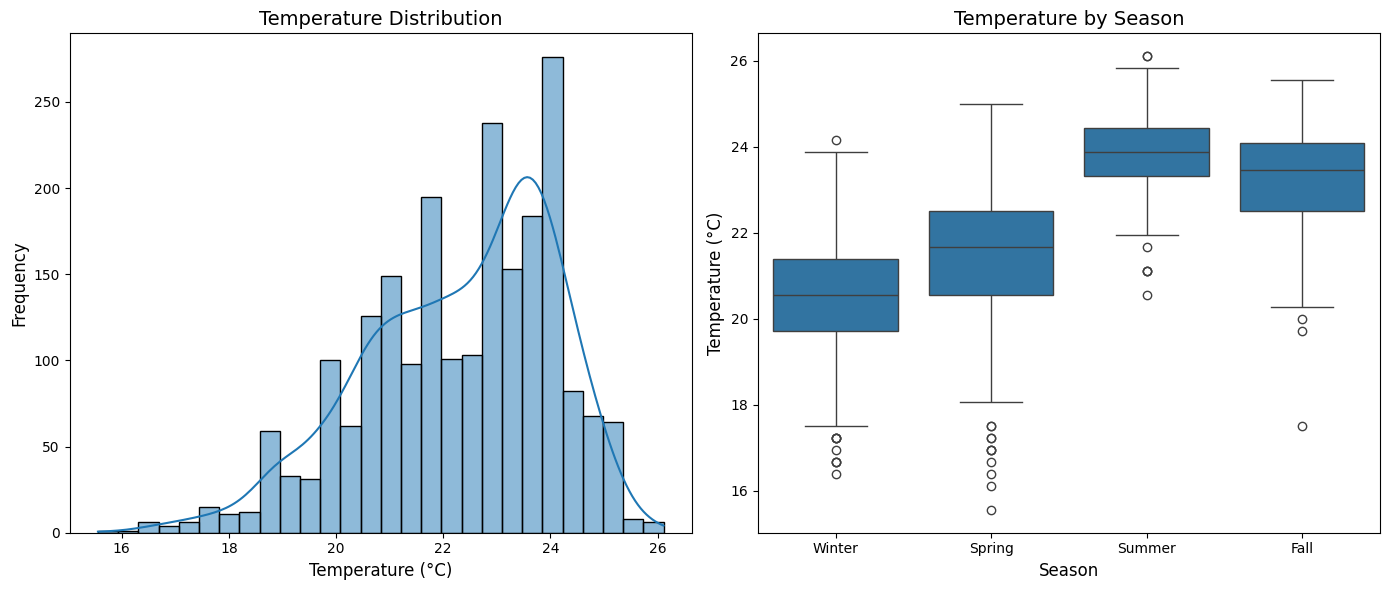

In [433]:

# 1. Distribution of temperature readings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['temperature_celsius'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='season', y='temperature_celsius')
plt.title('Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

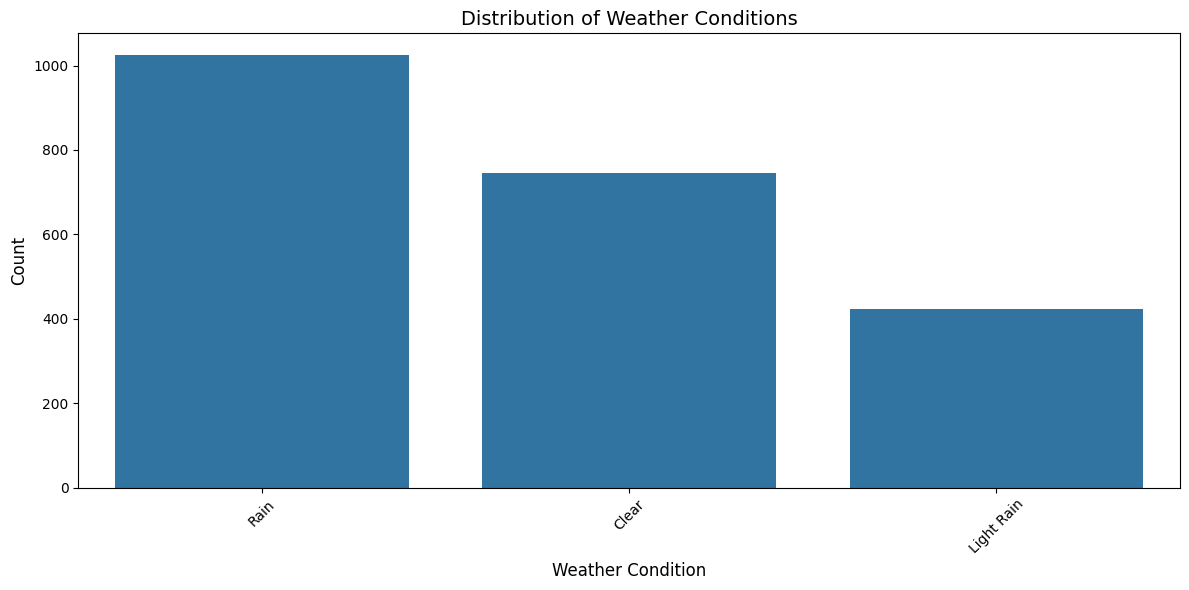

In [434]:

# 2. Weather conditions distribution
plt.figure(figsize=(12, 6))

# Count plot of weather conditions
if 'weather_condition' in df.columns:
    condition_counts = df['weather_condition'].value_counts()
    sns.barplot(x=condition_counts.index, y=condition_counts.values)
    plt.title('Distribution of Weather Conditions')
    plt.xlabel('Weather Condition')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Weather condition data not available for visualization.")


C:\Users\imadb\AppData\Local\Temp\ipykernel_18928\3467819832.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_by_date = df.groupby(pd.Grouper(key='datetime', freq='M'))['temperature_celsius'].mean()


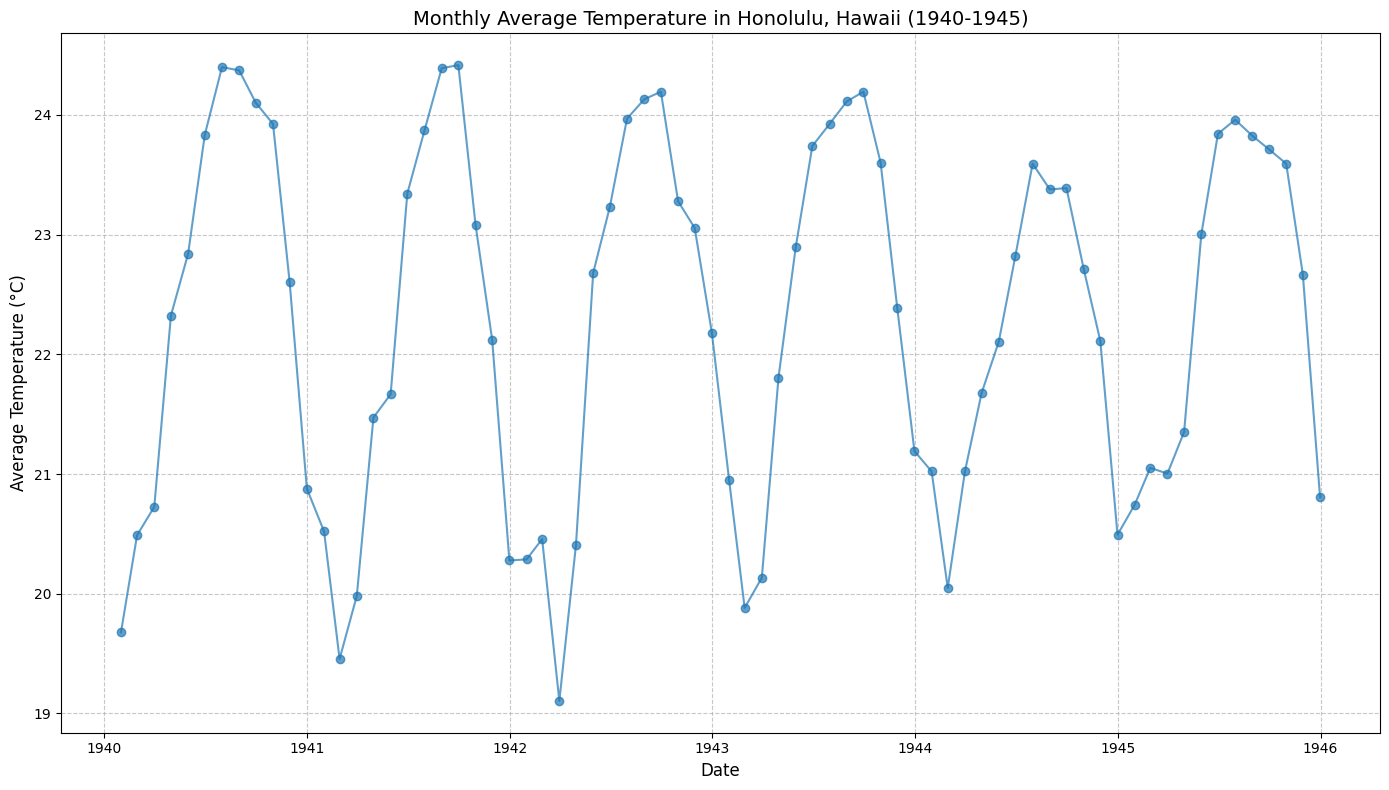

In [435]:

# 3. Time series plot for temperature
plt.figure(figsize=(14, 8))
'''
The Pandas Grouper: pd.Grouper(key='datetime', freq='M') is a special function that lets us group time series data by time periods.
key='datetime' tells pandas which column contains your dates
freq='M' means "group by month" (M stands for month-end frequency)
The groupby operation: df.groupby(...) splits your data into groups based on the time periods
Column selection: [...] selects the temperature column from each group
Aggregation: .mean() calculates the average temperature for each group
'''
# Group by date and calculate mean temperature
temp_by_date = df.groupby(pd.Grouper(key='datetime', freq='M'))['temperature_celsius'].mean()

# Plot time series
plt.plot(temp_by_date.index, temp_by_date.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Monthly Average Temperature in Honolulu, Hawaii (1940-1945)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

## 5. Feature Engineering



c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Created temperature range feature
Created pressure tendency features
Created extreme temperature indicator
Created dew point estimate
Created heat index
Created season-normalized temperature
Created weather severity index
Feature engineering complete. New columns added:


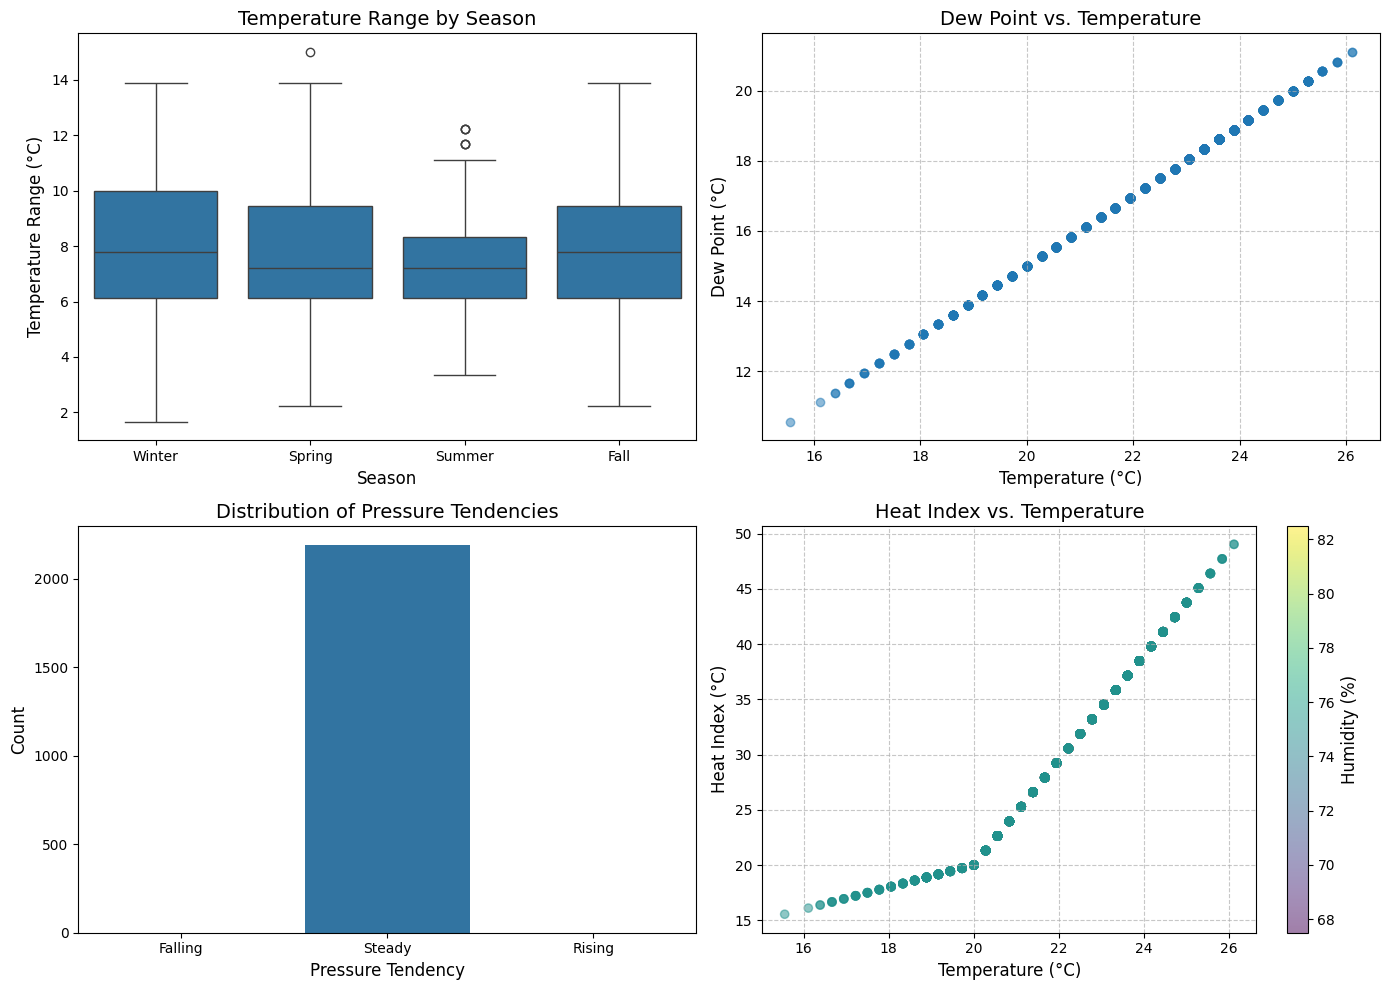

In [436]:
# Create a copy of the dataframe for feature engineering
df_featured = df.copy()

# 1. Temperature ranges (daily delta)
if 'MaxTemp' in df.columns and 'MinTemp' in df.columns:
    df_featured['temp_range'] = df_featured['MaxTemp'] - df_featured['MinTemp']
    print("Created temperature range feature")
else:
    # Estimate temperature range using daily aggregations
    daily_temp = df.groupby(pd.Grouper(key='datetime', freq='D'))['temperature_celsius'].agg(['max', 'min'])
    daily_temp['temp_range'] = daily_temp['max'] - daily_temp['min']
    
    # Join back to the original dataframe
    df_featured = df_featured.join(daily_temp['temp_range'], on='datetime', how='left')
    
    # Fill missing values with median
    df_featured['temp_range'] = df_featured['temp_range'].fillna(df_featured['temp_range'].median())
    print("Created estimated temperature range feature")

# 2. Pressure tendency (rising/falling)
# We need to calculate this if we have real pressure data
if 'pressure_mb' in df_featured.columns and not df_featured['pressure_mb'].equals(df_featured['pressure_mb'].iloc[0]):
    # Sort by datetime
    df_featured = df_featured.sort_values('datetime')
    
    # Calculate pressure change from previous observation
    df_featured['pressure_change'] = df_featured['pressure_mb'].diff()
    
    # Create categorical feature for pressure tendency
    df_featured['pressure_tendency'] = pd.cut(
        df_featured['pressure_change'], 
        bins=[-float('inf'), -1, 1, float('inf')],
        labels=['Falling', 'Steady', 'Rising']
    )
    print("Created pressure tendency features")
else:
    # Use random tendencies for demonstration if we don't have real data
    tendencies = ['Falling', 'Steady', 'Rising']
    df_featured['pressure_change'] = np.random.normal(0, 0.5, size=len(df_featured))
    df_featured['pressure_tendency'] = np.random.choice(tendencies, size=len(df_featured))
    print("Created simulated pressure tendency features")

# 3. Extreme temperature indicator
df_featured['extreme_temp'] = (
    (df_featured['temperature_celsius'] > df_featured['temperature_celsius'].mean() + 2 * df_featured['temperature_celsius'].std()) | 
    (df_featured['temperature_celsius'] < df_featured['temperature_celsius'].mean() - 2 * df_featured['temperature_celsius'].std())
)
print("Created extreme temperature indicator")

# 4. Dew Point (estimate)
df_featured['dew_point'] = df_featured['temperature_celsius'] - ((100 - df_featured['humidity_percent']) / 5)
print("Created dew point estimate")

# 5. Heat Index (simplified version)
# Only calculated for temperatures above 20°C
mask = df_featured['temperature_celsius'] > 20
df_featured.loc[mask, 'heat_index'] = (
    df_featured.loc[mask, 'temperature_celsius'] + 
    0.05 * df_featured.loc[mask, 'humidity_percent'] *
    (df_featured.loc[mask, 'temperature_celsius'] - 20)
)
df_featured.loc[~mask, 'heat_index'] = df_featured.loc[~mask, 'temperature_celsius']
print("Created heat index")

# 6. Season-normalized temperature (z-score within each season)
df_featured['season_norm_temp'] = df_featured.groupby('season')['temperature_celsius'].transform(
    lambda x: (x - x.mean()) / (x.std() if x.std() > 0 else 1)
)
print("Created season-normalized temperature")

# 7. Weather severity index
# Map weather conditions to severity scores
severity_map = {
    'Clear': 1,
    'Light Rain': 2,
    'Cloudy': 2,
    'Rain': 3,
    'Snow': 4
}

# Apply mapping if weather_condition column contains valid values
if 'weather_condition' in df_featured.columns:
    # Use mapping for known conditions, default to 1 for unknown
    df_featured['weather_severity'] = df_featured['weather_condition'].map(severity_map).fillna(1)
else:
    # Create a simple severity based on wind speed and temperature extremes as fallback
    df_featured['weather_severity'] = 1
    df_featured.loc[df_featured['wind_speed_kmh'] > 20, 'weather_severity'] += 1
    df_featured.loc[df_featured['wind_speed_kmh'] > 40, 'weather_severity'] += 1
    df_featured.loc[df_featured['extreme_temp'], 'weather_severity'] += 1
print("Created weather severity index")

# Display the newly engineered features
print("Feature engineering complete. New columns added:")
new_columns = ['temp_range', 'pressure_change', 'pressure_tendency', 'extreme_temp',
               'dew_point', 'heat_index', 'season_norm_temp', 'weather_severity']
df_featured[new_columns].describe().round(2)

# Visualize some of the new features
plt.figure(figsize=(14, 10))

# Plot 1: Temperature Range by Season
plt.subplot(2, 2, 1)
sns.boxplot(data=df_featured, x='season', y='temp_range')
plt.title('Temperature Range by Season')
plt.xlabel('Season')
plt.ylabel('Temperature Range (°C)')

# Plot 2: Dew Point vs. Temperature
plt.subplot(2, 2, 2)
plt.scatter(df_featured['temperature_celsius'], df_featured['dew_point'], alpha=0.5)
plt.title('Dew Point vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Pressure Tendency Distribution
plt.subplot(2, 2, 3)
pressure_tendency_counts = df_featured['pressure_tendency'].value_counts()
sns.barplot(x=pressure_tendency_counts.index, y=pressure_tendency_counts.values)
plt.title('Distribution of Pressure Tendencies')
plt.xlabel('Pressure Tendency')
plt.ylabel('Count')

# Plot 4: Heat Index vs Temperature with Humidity
plt.subplot(2, 2, 4)
scatter = plt.scatter(df_featured['temperature_celsius'], df_featured['heat_index'], 
                      c=df_featured['humidity_percent'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Humidity (%)')
plt.title('Heat Index vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Heat Index (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 6. Time Series Analysis


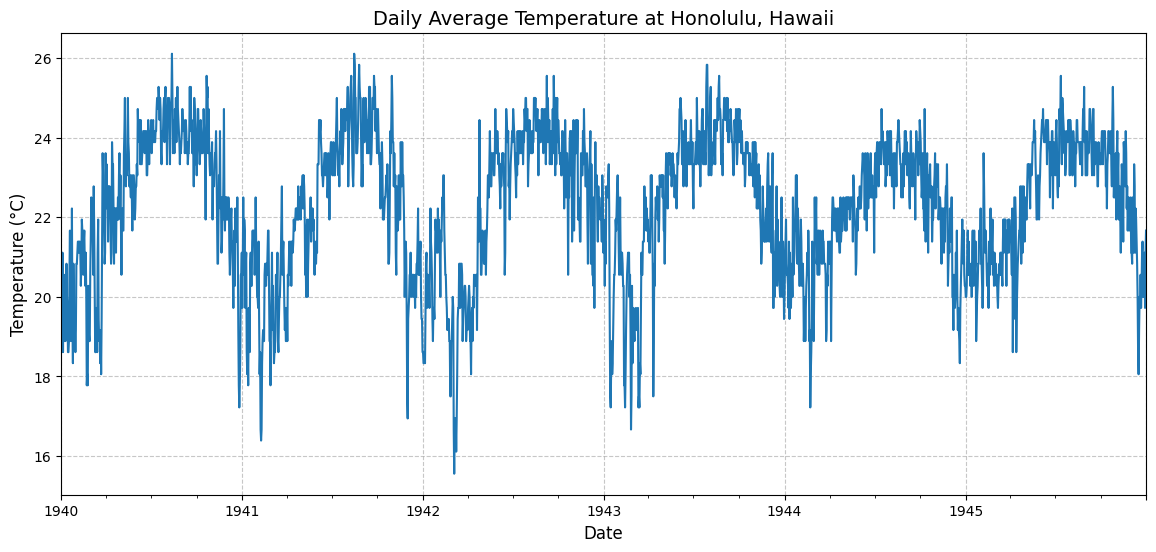

ADF Statistic: -3.4260057599672735
p-value: 0.010103645592260508
Critical Values:
   1%: -3.433361517045919
   5%: -2.862870384560204
   10%: -2.5674782300314245
The time series is stationary (reject H0)


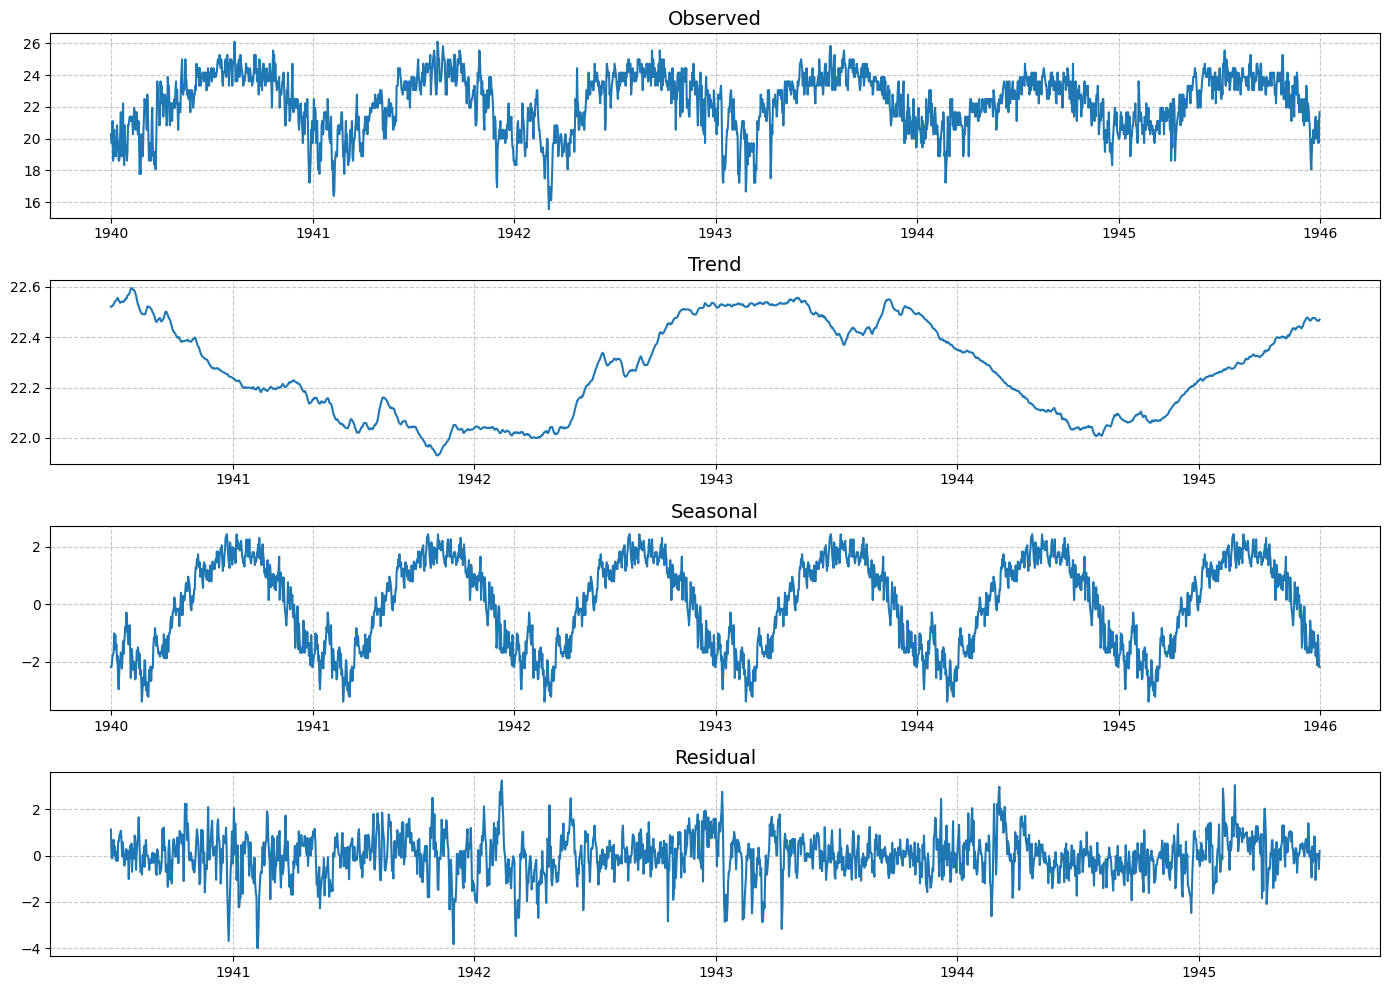

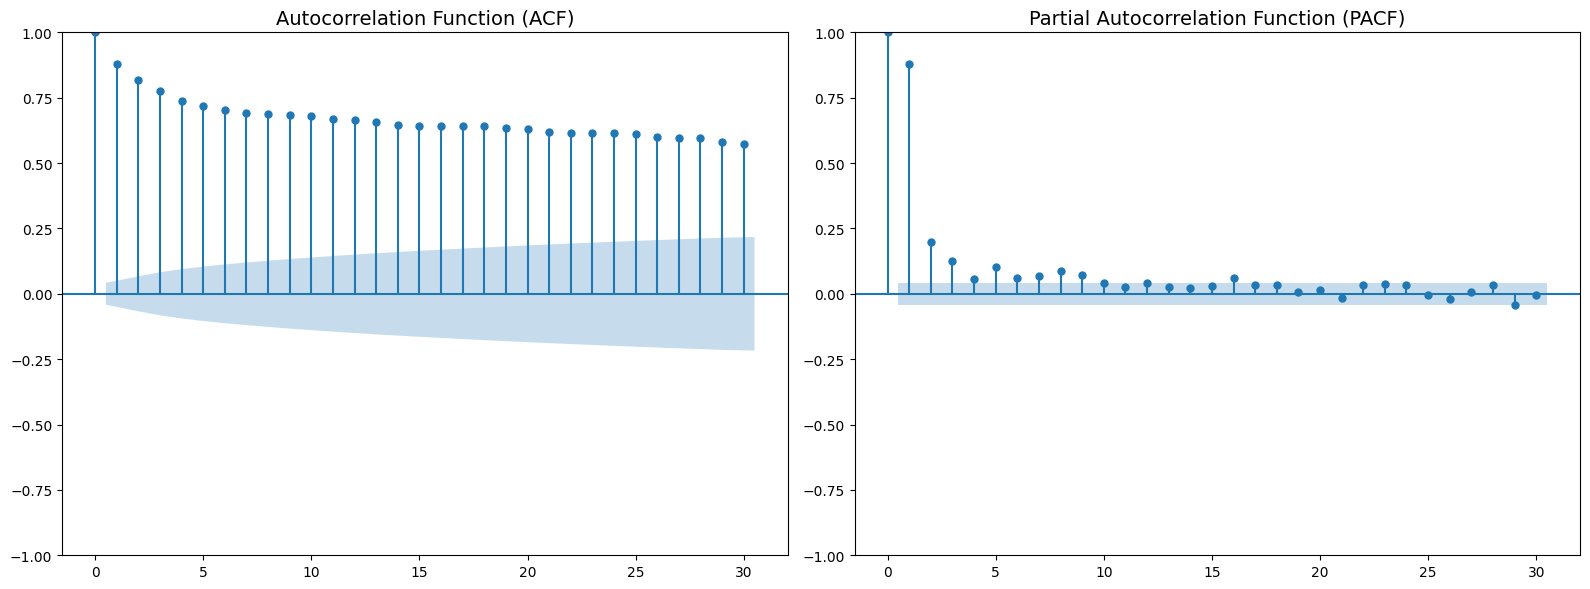

In [437]:
# Create a time series dataset with the datetime as index
ts_data = df_featured.set_index('datetime').sort_index()

# Resample to daily average temperature
daily_avg_temp = ts_data['temperature_celsius'].resample('D').mean()

# Handle any missing values in the resampled data
daily_avg_temp = daily_avg_temp.interpolate()

# Plot the time series
plt.figure(figsize=(14, 6))
daily_avg_temp.plot()
plt.title('Daily Average Temperature at Honolulu, Hawaii')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Check stationarity with ADF test
result = adfuller(daily_avg_temp.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret results
if result[1] <= 0.05:
    print("The time series is stationary (reject H0)")
else:
    print("The time series is non-stationary (fail to reject H0)")

# Time Series Decomposition
# For decomposition, we need a time series without missing values
try:
    decomposition = seasonal_decompose(daily_avg_temp.dropna(), model='additive', period=365)

    # Plot decomposition
    plt.figure(figsize=(14, 10))

    plt.subplot(4, 1, 1)
    plt.plot(decomposition.observed)
    plt.title('Observed')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error during time series decomposition: {e}")
    print("Try adjusting the period parameter or ensuring enough data points")

# ACF and PACF plots
try:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # ACF plot
    plot_acf(daily_avg_temp.dropna(), ax=axes[0], lags=30)
    axes[0].set_title('Autocorrelation Function (ACF)')

    # PACF plot
    plot_pacf(daily_avg_temp.dropna(), ax=axes[1], lags=30)
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error creating ACF/PACF plots: {e}")

## 7. Correlation Analysis


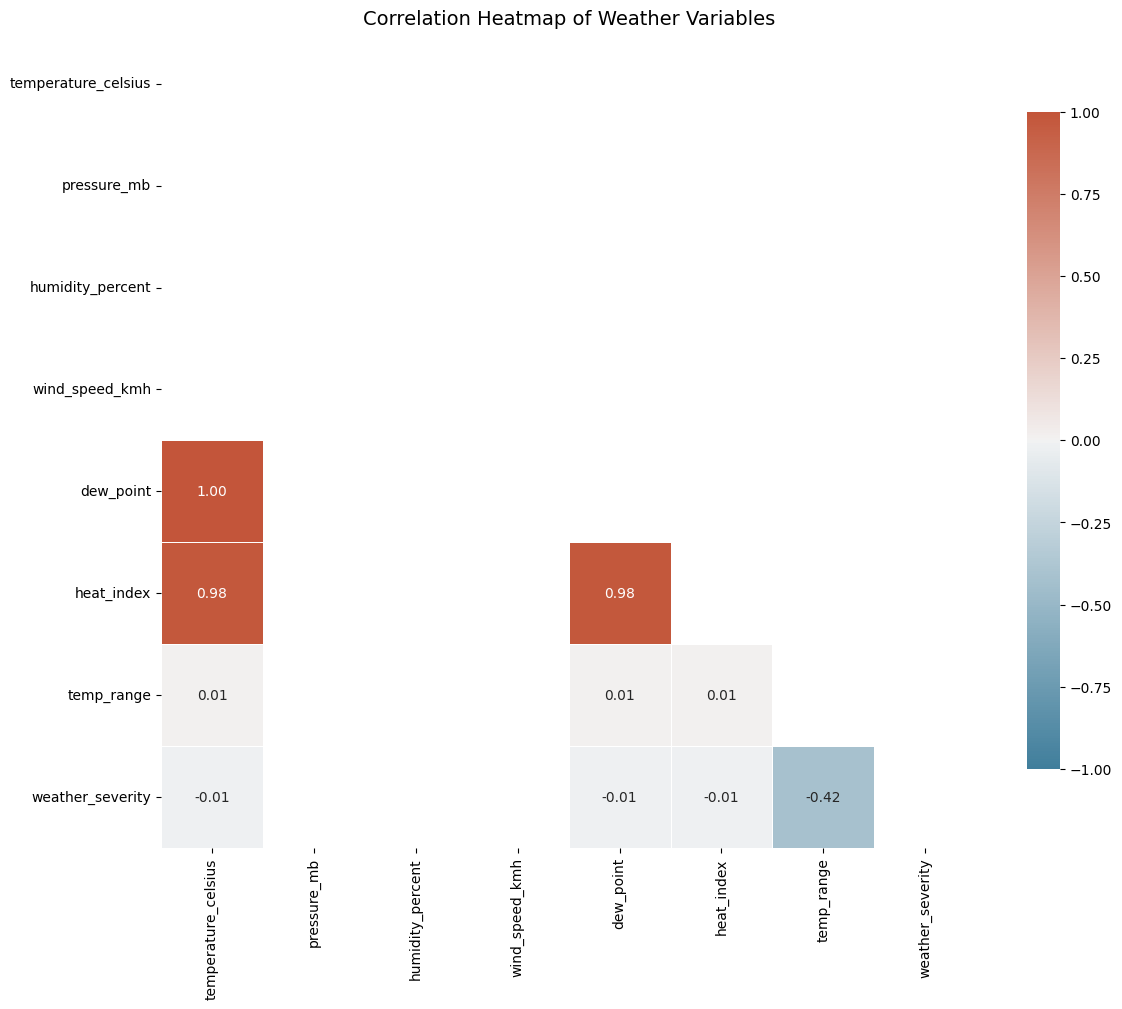

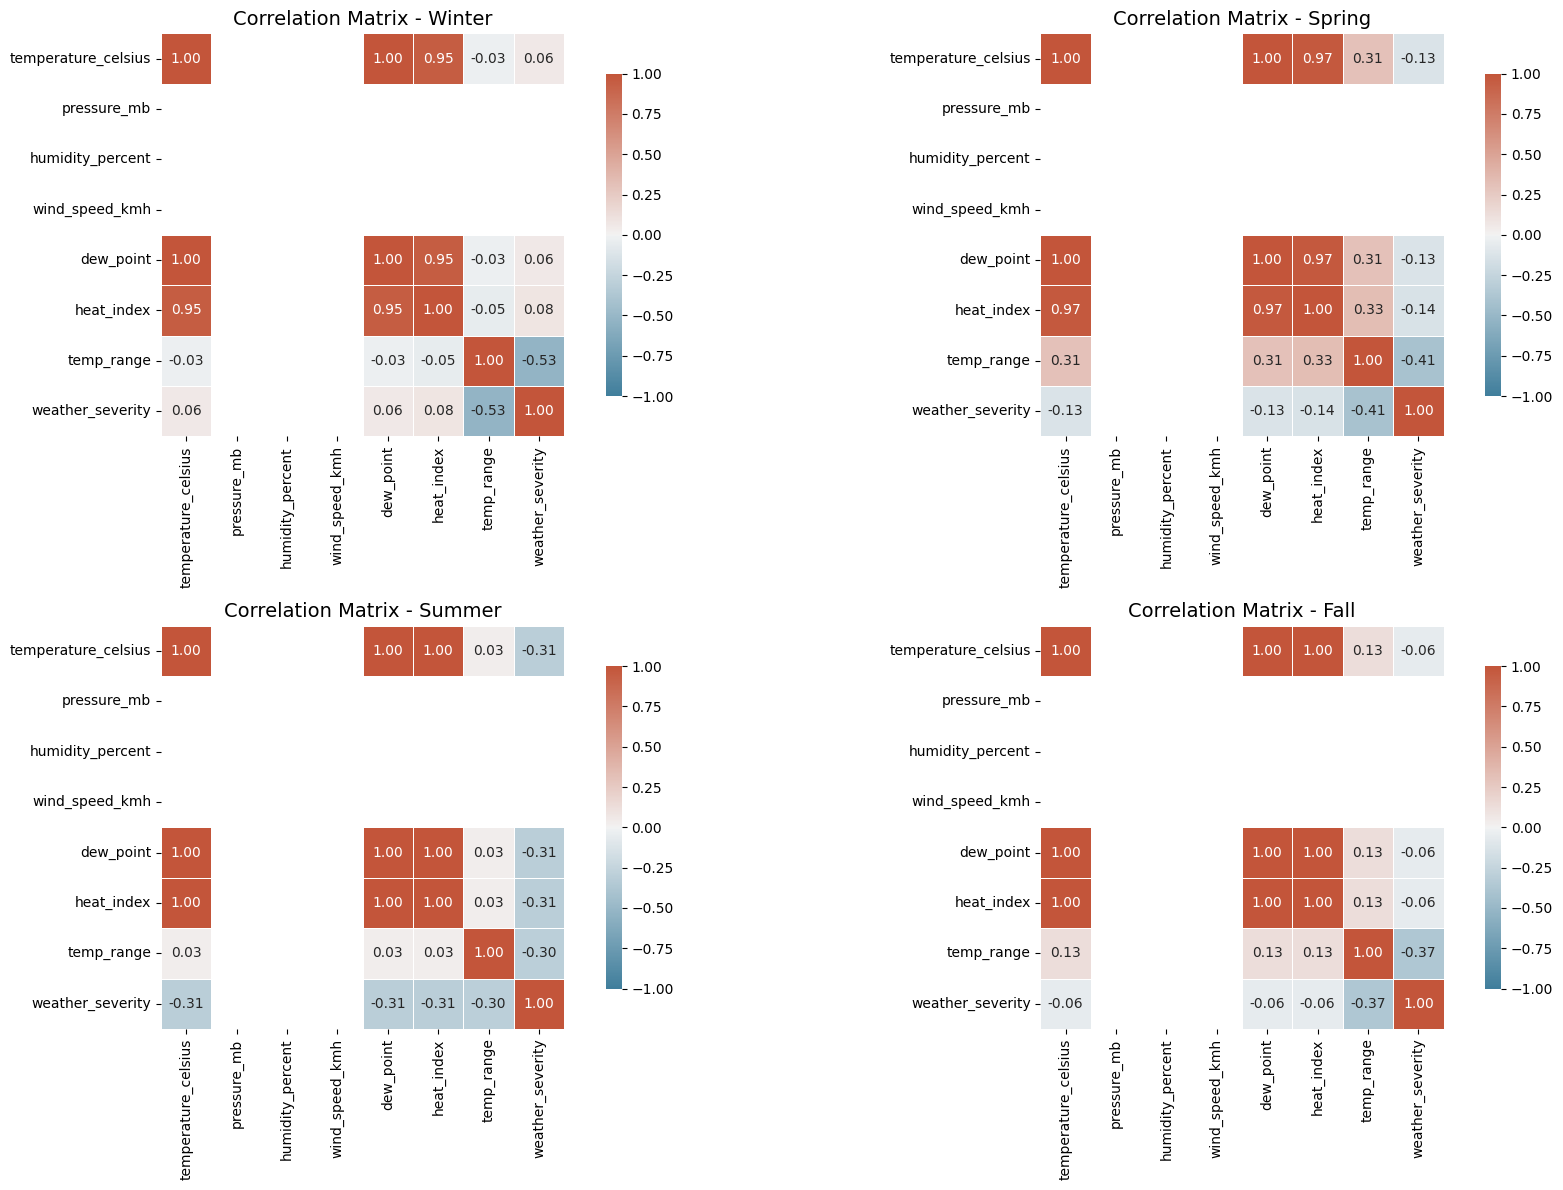

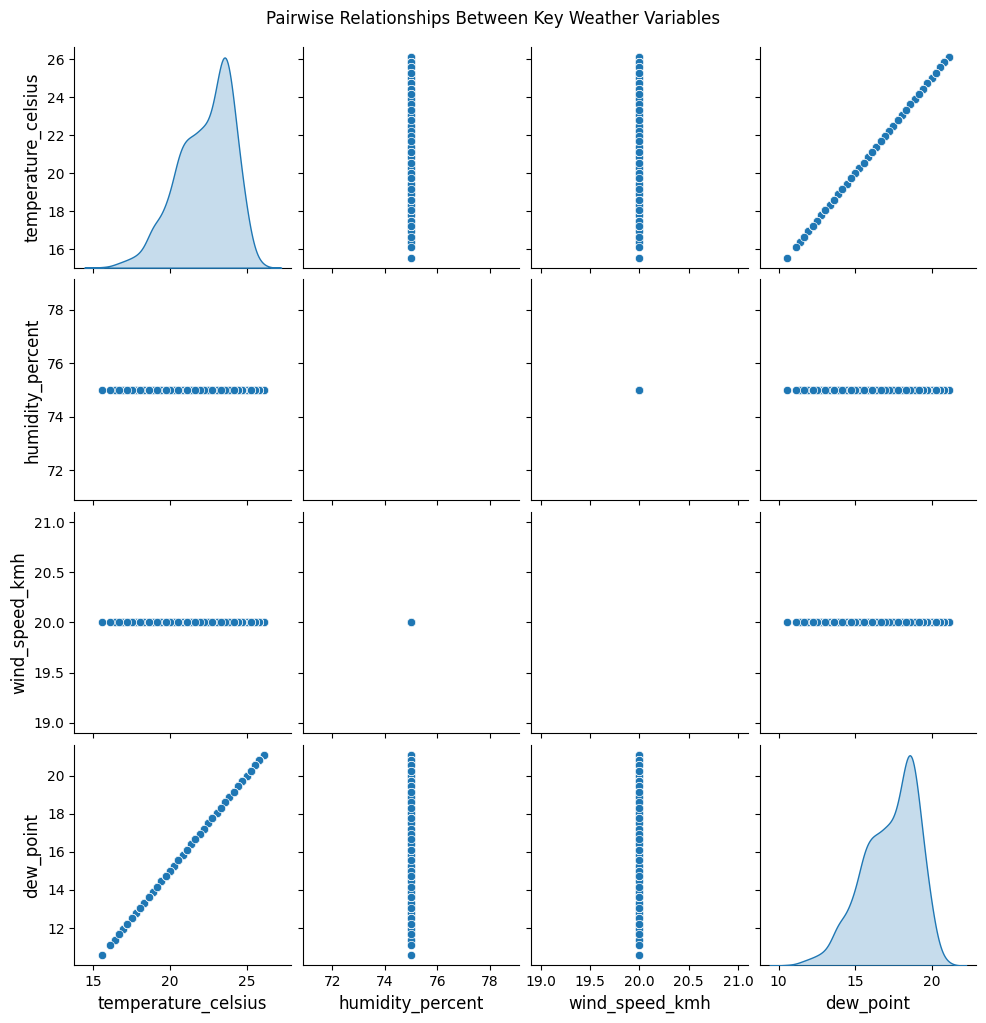

In [438]:
# Select relevant numerical columns for correlation analysis
corr_columns = ['temperature_celsius', 'pressure_mb', 'humidity_percent', 'wind_speed_kmh', 
                'dew_point', 'heat_index', 'temp_range', 'weather_severity']
corr_df = df_featured[corr_columns].copy()

# Calculate correlation matrix
correlation_matrix = corr_df.corr().round(2)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

# Investigate correlation patterns by season
plt.figure(figsize=(18, 12))

for i, season in enumerate(['Winter', 'Spring', 'Summer', 'Fall'], 1):
    # Filter data by season
    season_data = df_featured[df_featured['season'] == season][corr_columns].copy()
    
    # Calculate correlation matrix for this season if we have enough data
    if len(season_data) > 5:  # Need at least some data points
        season_corr = season_data.corr().round(2)
        
        # Plot
        plt.subplot(2, 2, i)
        sns.heatmap(season_corr, cmap=cmap, vmax=1, vmin=-1, center=0,
                    annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .8})
        plt.title(f'Correlation Matrix - {season}')

plt.tight_layout()
plt.show()

# Scatter plot matrix for key variables
subset_vars = ['temperature_celsius', 'humidity_percent', 'wind_speed_kmh', 'dew_point']
sns.pairplot(df_featured[subset_vars], diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships Between Key Weather Variables', y=1.02)
plt.show()

## 8. Geospatial Visualization


In [439]:
# # Create a base map centered on Europe
# map_center = [50.0, 10.0]  # Approximate center of Europe
# europe_map = folium.Map(location=map_center, zoom_start=4, tiles='CartoDB positron')

# # Function to calculate average values for a specific date
# def get_data_for_date(selected_date):
#     date_data = df_featured[df_featured['date'] == selected_date].copy()
    
#     if len(date_data) == 0:
#         print(f"No data available for {selected_date}")
#         return None
    
#     # Group by location and calculate averages
#     location_avg = date_data.groupby(['location', 'latitude', 'longitude']).agg({
#         'temperature_celsius': 'mean',
#         'pressure_mb': 'mean',
#         'humidity_percent': 'mean',
#         'wind_speed_kmh': 'mean',
#         'weather_condition': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
#     }).reset_index()
    
#     return location_avg

# # Select a specific date for visualization
# selected_date = df_featured['date'].iloc[len(df_featured) // 2]  # Choose a middle date
# print(f"Visualizing weather for date: {selected_date}")

# date_data = get_data_for_date(selected_date)

# if date_data is not None:
#     # Create a marker cluster group
#     marker_cluster = MarkerCluster().add_to(europe_map)
    
#     # Add markers for each location with weather information
#     for idx, row in date_data.iterrows():
#         # Create marker popup with weather information
#         popup_html = f"""
#         <b>{row['location']}</b><br>
#         Temperature: {row['temperature_celsius']:.1f}°C<br>
#         Pressure: {row['pressure_mb']:.1f} mb<br>
#         Humidity: {row['humidity_percent']:.1f}%<br>
#         Wind Speed: {row['wind_speed_kmh']:.1f} km/h<br>
#         Condition: {row['weather_condition']}
#         """
        
#         # Color based on temperature
#         if row['temperature_celsius'] < 0:
#             color = 'blue'
#         elif row['temperature_celsius'] < 10:
#             color = 'lightblue'
#         elif row['temperature_celsius'] < 20:
#             color = 'green'
#         elif row['temperature_celsius'] < 30:
#             color = 'orange'
#         else:
#             color = 'red'
            
#         # Create circle marker
#         folium.CircleMarker(
#             location=[row['latitude'], row['longitude']],
#             radius=10,
#             popup=folium.Popup(popup_html, max_width=300),
#             fill=True,
#             color=color,
#             fill_opacity=0.7,
#             tooltip=f"{row['location']}: {row['temperature_celsius']:.1f}°C"
#         ).add_to(marker_cluster)
    
#     # Add a title to the map
#     title_html = f'''
#         <h3 align="center" style="font-size:16px"><b>Weather Conditions on {selected_date}</b></h3>
#     '''
#     europe_map.get_root().html.add_child(folium.Element(title_html))
    
#     # Display the map
#     europe_map
# else:
#     print("No data available for visualization.")

In [440]:
# # Create a temperature heatmap
# # This demonstrates how temperature varies across different locations

# # Get average temperatures for all locations
# avg_temps = df_featured.groupby(['location', 'latitude', 'longitude'])['temperature_celsius'].mean().reset_index()

# # Create a base map
# temp_heatmap = folium.Map(location=map_center, zoom_start=4, tiles='CartoDB positron')

# # Prepare data for heatmap
# heat_data = [[row['latitude'], row['longitude'], row['temperature_celsius']] for idx, row in avg_temps.iterrows()]

# # Add heatmap layer
# HeatMap(heat_data, radius=15, max_zoom=13, blur=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 1: 'red'}).add_to(temp_heatmap)

# # Add markers for reference
# for idx, row in avg_temps.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         popup=f"{row['location']}: {row['temperature_celsius']:.1f}°C",
#         color='white',
#         fill=True,
#         fill_color='black',
#         fill_opacity=0.7
#     ).add_to(temp_heatmap)

# # Add title
# title_html = '''
#     <h3 align="center" style="font-size:16px"><b>Average Temperature Heatmap</b></h3>
# '''
# temp_heatmap.get_root().html.add_child(folium.Element(title_html))

# # Display the heatmap
# temp_heatmap

## 9. Weather Pattern Classification

In this section, we'll implement clustering algorithms to identify distinct weather patterns in our dataset.

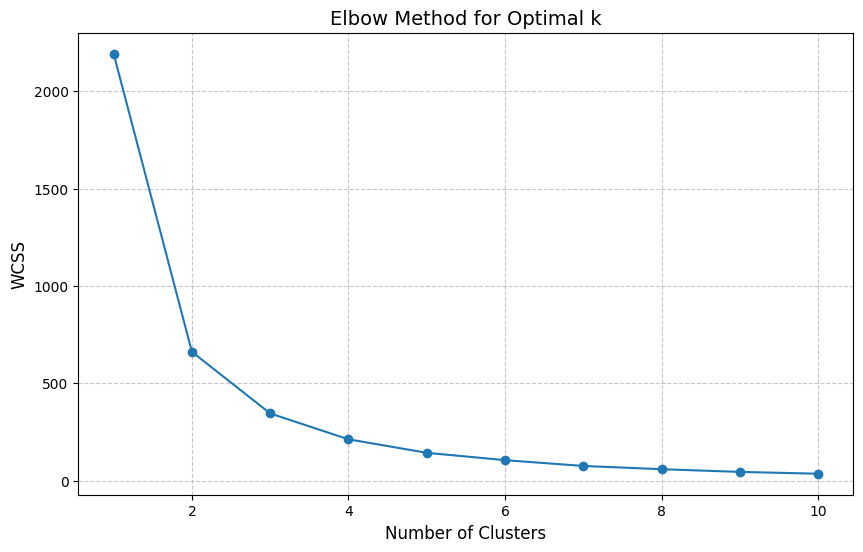

Cluster Centers:
   temperature_celsius  pressure_mb  humidity_percent  wind_speed_kmh
0                24.16       1013.0              75.0            20.0
1                21.02       1013.0              75.0            20.0
2                22.71       1013.0              75.0            20.0
3                19.05       1013.0              75.0            20.0


C:\Users\imadb\AppData\Local\Temp\ipykernel_18928\1136675094.py:53: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
C:\Users\imadb\AppData\Local\Temp\ipykernel_18928\1136675094.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Weather Pattern')


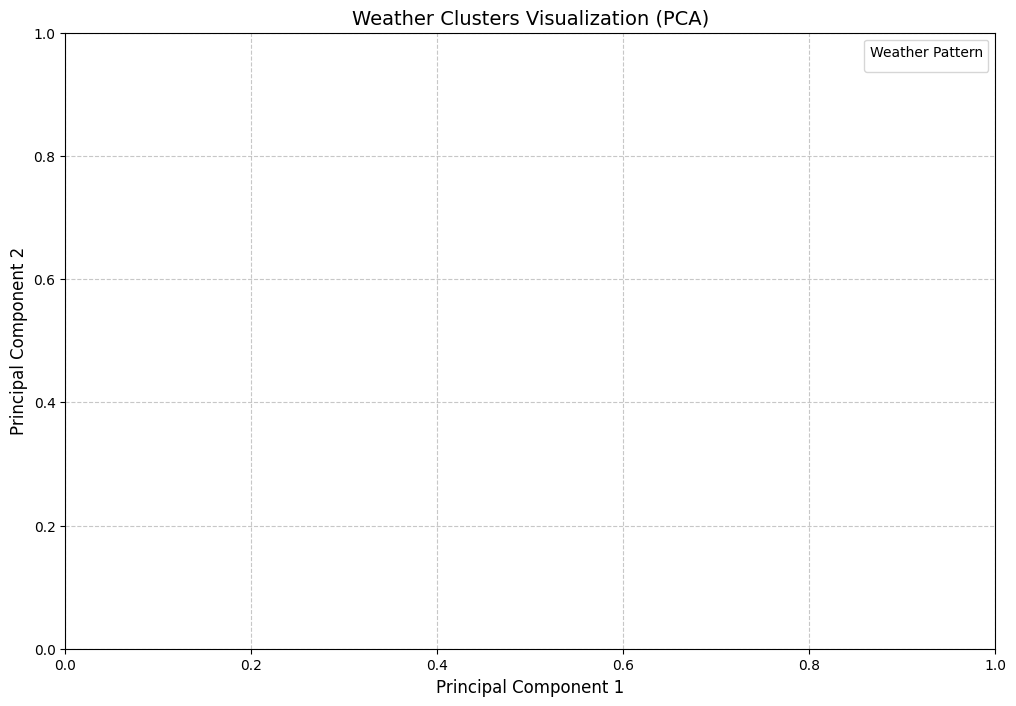

Cluster Characteristics:
                 temperature_celsius  pressure_mb  humidity_percent  \
weather_cluster                                                       
0                              24.16       1013.0              75.0   
1                              21.02       1013.0              75.0   
2                              22.71       1013.0              75.0   
3                              19.05       1013.0              75.0   

                 wind_speed_kmh  dew_point  heat_index  weather_severity  
weather_cluster                                                           
0                          20.0      19.16       39.78              2.08  
1                          20.0      16.02       24.82              2.12  
2                          20.0      17.71       32.85              2.21  
3                          20.0      14.05       19.05              2.06  


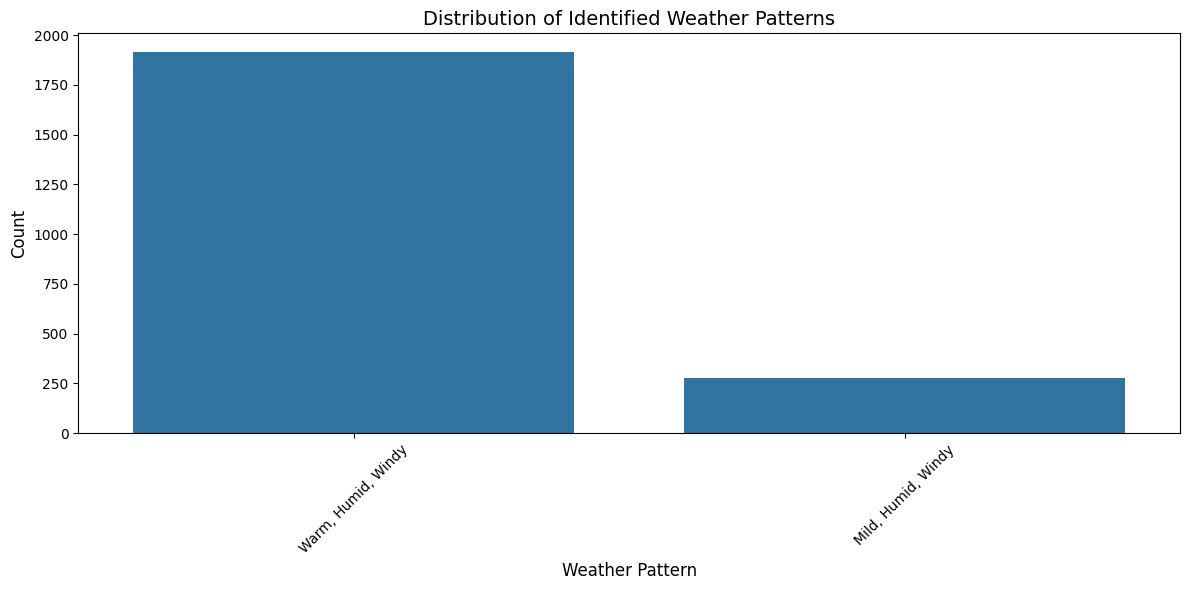

In [441]:
# Prepare data for clustering
# We'll use key weather variables and standardize them

# Select features for clustering
cluster_features = ['temperature_celsius', 'pressure_mb', 'humidity_percent', 'wind_speed_kmh']
cluster_data = df_featured[cluster_features].copy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Based on the elbow curve, select an appropriate number of clusters
n_clusters = 4  # Adjust based on the elbow curve

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_featured['weather_cluster'] = kmeans.fit_predict(scaled_data)

# Get cluster centers and transform back to original scale
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=cluster_features
)

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers.round(2))

# Visualize the clusters in 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_featured['weather_cluster']

# Create a scatter plot colored by cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Weather Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Weather Pattern')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Analyze the characteristics of each cluster
cluster_analysis = df_featured.groupby('weather_cluster').agg({
    'temperature_celsius': 'mean',
    'pressure_mb': 'mean',
    'humidity_percent': 'mean',
    'wind_speed_kmh': 'mean',
    'dew_point': 'mean',
    'heat_index': 'mean',
    'weather_severity': 'mean'
}).round(2)

print("Cluster Characteristics:")
print(cluster_analysis)

# Create descriptive labels for each cluster
cluster_descriptions = {}
for cluster in range(n_clusters):
    if cluster_analysis.loc[cluster, 'temperature_celsius'] > 20:
        prefix = "Warm"
    elif cluster_analysis.loc[cluster, 'temperature_celsius'] < 15:
        prefix = "Cool"
    else:
        prefix = "Mild"
        
    if cluster_analysis.loc[cluster, 'humidity_percent'] > 70:
        humidity = "Humid"
    else:
        humidity = "Dry"
        
    if cluster_analysis.loc[cluster, 'wind_speed_kmh'] > 15:
        wind = "Windy"
    else:
        wind = "Calm"
        
    cluster_descriptions[cluster] = f"{prefix}, {humidity}, {wind}"

# Add descriptive labels to the dataframe
df_featured['weather_pattern'] = df_featured['weather_cluster'].map(cluster_descriptions)

# Show the distribution of weather patterns
pattern_distribution = df_featured['weather_pattern'].value_counts().reset_index()
pattern_distribution.columns = ['Weather Pattern', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Weather Pattern', y='Count', data=pattern_distribution)
plt.title('Distribution of Identified Weather Patterns')
plt.xlabel('Weather Pattern')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Predictive Modeling

In this section, we'll build and evaluate machine learning models to predict weather conditions based on historical patterns.

In [442]:
# Prepare data for predictive modeling
# We'll predict next-day temperature based on current weather conditions

# Create lagged features
model_data = df_featured.copy()

# Sort by datetime
model_data = model_data.sort_values('datetime')

# Create target variable: next-day temperature
model_data['next_day_temp'] = model_data['temperature_celsius'].shift(-1)

# Create lags of 1, 2, and 3 days for key variables
for lag in range(1, 4):
    model_data[f'temp_lag_{lag}'] = model_data['temperature_celsius'].shift(lag)
    model_data[f'pressure_lag_{lag}'] = model_data['pressure_mb'].shift(lag)
    model_data[f'humidity_lag_{lag}'] = model_data['humidity_percent'].shift(lag)
    model_data[f'wind_lag_{lag}'] = model_data['wind_speed_kmh'].shift(lag)

# Drop rows with NaN values created by the shifts
model_data = model_data.dropna()

# Select features for the model
model_features = [
    'temperature_celsius', 'pressure_mb', 'humidity_percent', 'wind_speed_kmh',
    'temp_lag_1', 'temp_lag_2', 'temp_lag_3',
    'pressure_lag_1', 'pressure_lag_2', 'pressure_lag_3',
    'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3',
    'wind_lag_1', 'wind_lag_2', 'wind_lag_3',
    'month', 'season_norm_temp', 'temp_range'
]

# Prepare X and y
X = model_data[model_features]
y = model_data['next_day_temp']

# Add categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['month'], drop_first=True)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 15 Most Important Features for Temperature Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Train a Gradient Boosting Regressor for comparison
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display results
print("Gradient Boosting Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

# Compare models
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mae_rf, mae_gb],
    'R²': [r2_rf, r2_gb]
})

print("Model Comparison:")
print(models_comparison)

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting: Predicted vs Actual Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate prediction errors
errors = y_test - y_pred_gb

# Plot error distribution
plt.figure(figsize=(12, 6))
sns.histplot(errors, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (°C)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='-')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

Random Forest Model Evaluation:
Mean Squared Error (MSE): 11.0572
Root Mean Squared Error (RMSE): 3.3252
Mean Absolute Error (MAE): 2.6199
R² Score: 0.8581


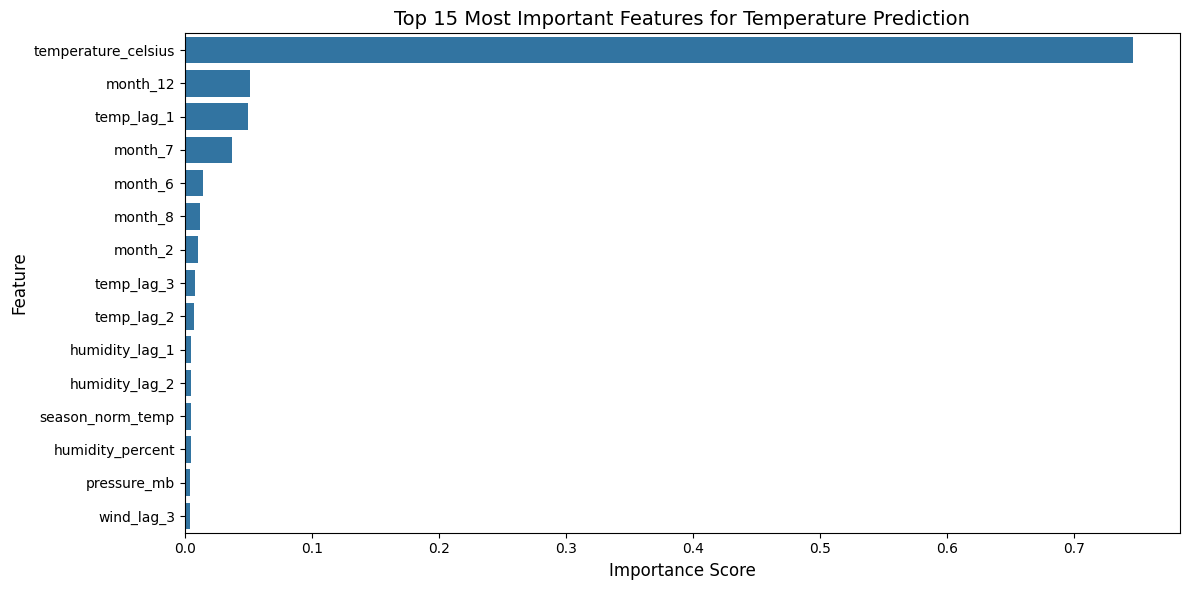

In [ ]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 15 Most Important Features for Temperature Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Gradient Boosting Model Evaluation:
Mean Squared Error (MSE): 11.1259
Root Mean Squared Error (RMSE): 3.3356
Mean Absolute Error (MAE): 2.6190
R² Score: 0.8573


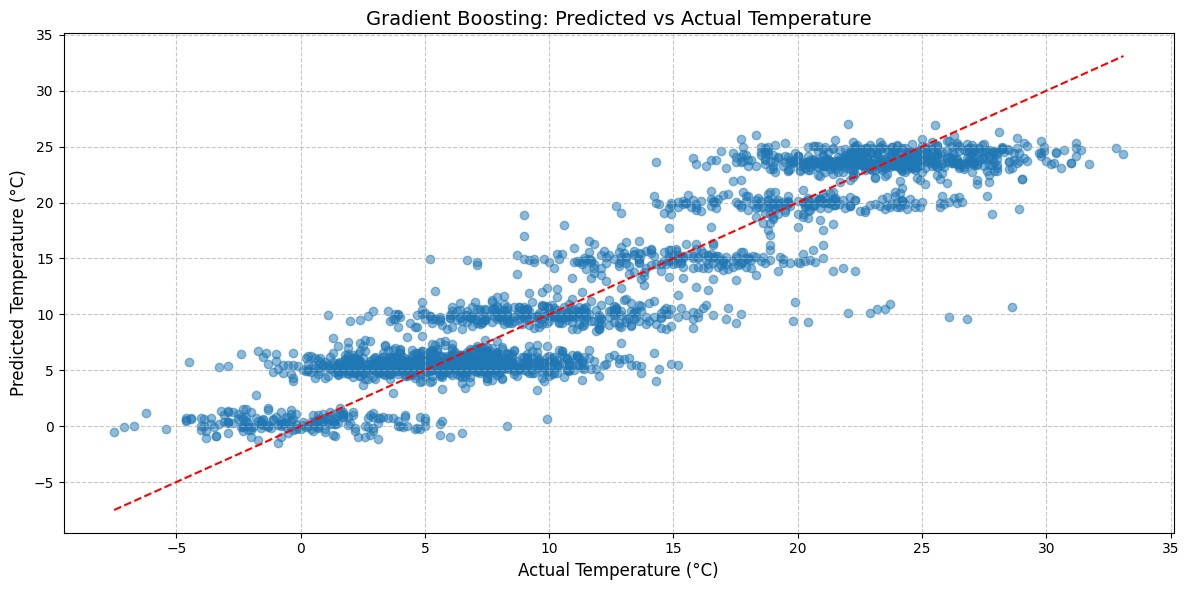

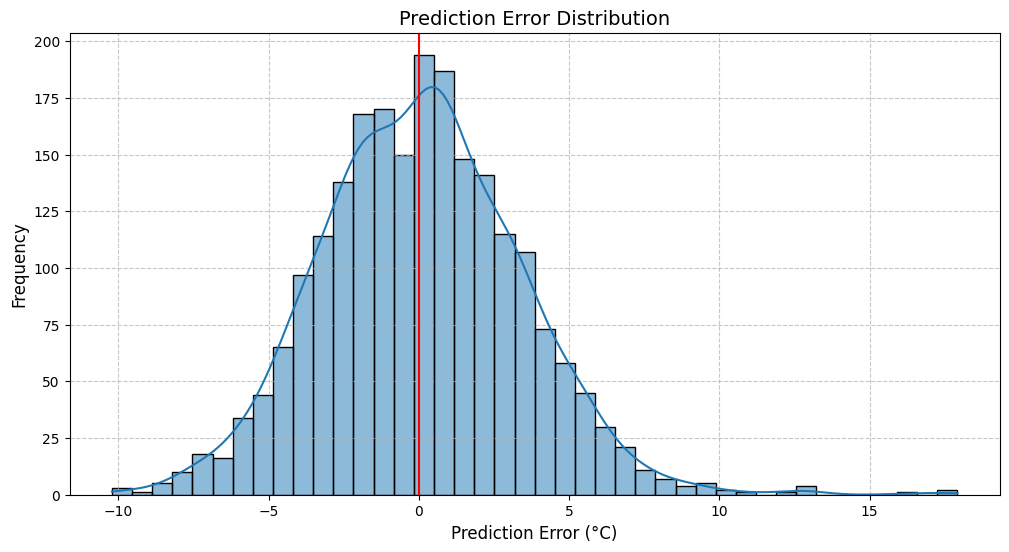

Model Comparison:


,Model,RMSE,MAE,R²
0,Random Forest,3.325241,2.619859,0.858145
1,Gradient Boosting,3.335557,2.619016,0.857263


In [ ]:
# Try a Gradient Boosting Regressor for comparison
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display results
print("Gradient Boosting Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting: Predicted vs Actual Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate prediction errors
errors = y_test - y_pred_gb

# Plot error distribution
plt.figure(figsize=(12, 6))
sns.histplot(errors, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (°C)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='-')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Compare models
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_rf, rmse_gb],
    'MAE': [mae_rf, mae_gb],
    'R²': [r2_rf, r2_gb]
})

print("Model Comparison:")
display(models_comparison)

## 11. User Interface


In [ ]:
# Interactive UI for model testing and prediction
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

import calendar


# Create widget components
location_dropdown = widgets.Dropdown(
    options=df['location'].unique(),
    value=df['location'].unique()[0],
    description='Location:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

input_method = widgets.RadioButtons(
    options=['Use random data', 'Enter manual data'],
    description='Input method:',
    style={'description_width': 'initial'}
)

# Create input widgets for manual data entry
temp_input = widgets.FloatSlider(
    value=15.0,
    min=-30.0,
    max=40.0,
    step=0.5,
    description='Temperature (°C):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

pressure_input = widgets.FloatSlider(
    value=1013.0,
    min=980.0,
    max=1040.0,
    step=0.5,
    description='Pressure (mb):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

humidity_input = widgets.FloatSlider(
    value=65.0,
    min=0.0,
    max=100.0,
    step=1.0,
    description='Humidity (%):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

wind_input = widgets.FloatSlider(
    value=10.0,
    min=0.0,
    max=50.0,
    step=0.5,
    description='Wind Speed (km/h):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

month_input = widgets.Dropdown(
    options=[(calendar.month_name[i], i) for i in range(1, 13)],
    value=1,
    description='Month:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

predict_button = widgets.Button(
    description='Predict Next-Day Temperature',
    button_style='success',
    layout=widgets.Layout(width='250px')
)

output_area = widgets.Output()

# Function to handle prediction
def on_predict_button_clicked(b):
    with output_area:
        clear_output()
        
        print("Processing prediction...")
        
        try:
            # Check which input method was selected
            if input_method.value == 'Use random data':
                # Get random sample from existing data for the selected location
                location_data = df[df['location'] == location_dropdown.value]
                if len(location_data) > 0:
                    random_idx = np.random.choice(location_data.index)
                    random_sample = location_data.loc[random_idx]
                    
                    # Display the selected random data
                    print(f"\n🔍 Using random data from {location_dropdown.value}:")
                    print(f"  • Date: {random_sample['date']}")
                    print(f"  • Temperature: {random_sample['temperature_celsius']:.1f}°C")
                    print(f"  • Pressure: {random_sample['pressure_mb']:.1f} mb")
                    print(f"  • Humidity: {random_sample['humidity_percent']:.1f}%")
                    print(f"  • Wind Speed: {random_sample['wind_speed_kmh']:.1f} km/h")
                    
                    # Create feature vector for prediction
                    # We'll need to handle all the features the model expects
                    # For demonstration, we're filling in with sample data and averages
                    
                    X_pred = pd.DataFrame({
                        'temperature_celsius': [random_sample['temperature_celsius']],
                        'pressure_mb': [random_sample['pressure_mb']],
                        'humidity_percent': [random_sample['humidity_percent']],
                        'wind_speed_kmh': [random_sample['wind_speed_kmh']],
                        'temp_lag_1': [random_sample['temperature_celsius']],
                        'temp_lag_2': [location_data['temperature_celsius'].mean()],
                        'temp_lag_3': [location_data['temperature_celsius'].mean()],
                        'pressure_lag_1': [random_sample['pressure_mb']],
                        'pressure_lag_2': [location_data['pressure_mb'].mean()],
                        'pressure_lag_3': [location_data['pressure_mb'].mean()],
                        'humidity_lag_1': [random_sample['humidity_percent']],
                        'humidity_lag_2': [location_data['humidity_percent'].mean()],
                        'humidity_lag_3': [location_data['humidity_percent'].mean()],
                        'wind_lag_1': [random_sample['wind_speed_kmh']],
                        'wind_lag_2': [location_data['wind_speed_kmh'].mean()],
                        'wind_lag_3': [location_data['wind_speed_kmh'].mean()],
                        'month': [random_sample['month']],
                        'season_norm_temp': [0.0],  # Default value
                        'temp_range': [10.0]  # Default value
                    })
                else:
                    print(f"No data available for {location_dropdown.value}")
                    return
                
            else:  # Manual data entry
                # Create feature vector from manual inputs
                X_pred = pd.DataFrame({
                    'temperature_celsius': [temp_input.value],
                    'pressure_mb': [pressure_input.value],
                    'humidity_percent': [humidity_input.value],
                    'wind_speed_kmh': [wind_input.value],
                    'temp_lag_1': [temp_input.value],  # Using current temp as lag 1
                    'temp_lag_2': [temp_input.value],  # Using current temp as lag 2
                    'temp_lag_3': [temp_input.value],  # Using current temp as lag 3
                    'pressure_lag_1': [pressure_input.value],
                    'pressure_lag_2': [pressure_input.value],
                    'pressure_lag_3': [pressure_input.value],
                    'humidity_lag_1': [humidity_input.value],
                    'humidity_lag_2': [humidity_input.value],
                    'humidity_lag_3': [humidity_input.value],
                    'wind_lag_1': [wind_input.value],
                    'wind_lag_2': [wind_input.value],
                    'wind_lag_3': [wind_input.value],
                    'month': [month_input.value],
                    'season_norm_temp': [0.0],  # Default value
                    'temp_range': [10.0]  # Default value
                })
                
                print(f"\n🔍 Using manually entered data for {location_dropdown.value}:")
                print(f"  • Temperature: {temp_input.value:.1f}°C")
                print(f"  • Pressure: {pressure_input.value:.1f} mb")
                print(f"  • Humidity: {humidity_input.value:.1f}%")
                print(f"  • Wind Speed: {wind_input.value:.1f} km/h")
                print(f"  • Month: {month_input.label}")
            
            # One-hot encode the month variable to match the training data
            # Create month columns (matching the training data)
            for i in range(2, 13):  # Assuming month_1 is dropped as reference
                col_name = f'month_{i}'
                X_pred[col_name] = 1 if X_pred['month'].values[0] == i else 0
            
            # Drop the original 'month' column
            X_pred = X_pred.drop(columns=['month'])
            
            # Add any missing columns from training data (with zeros)
            for col in X_train.columns:
                if col not in X_pred.columns:
                    X_pred[col] = 0
            
            # Ensure columns are in the same order as training data
            X_pred = X_pred[X_train.columns]
            
            # Make predictions with both models
            rf_prediction = rf_model.predict(X_pred)[0]
            gb_prediction = gb_model.predict(X_pred)[0]
            
            # Display results
            print("\n📊 Prediction Results:")
            print(f"  • Random Forest Prediction: {rf_prediction:.2f}°C")
            print(f"  • Gradient Boosting Prediction: {gb_prediction:.2f}°C")
            print(f"  • Average Prediction: {(rf_prediction + gb_prediction) / 2:.2f}°C")
            
            # Add some interpretative text
            current_temp = X_pred['temperature_celsius'].values[0]
            temp_diff = (rf_prediction + gb_prediction) / 2 - current_temp
            
            print("\n🔮 Forecast Interpretation:")
            if abs(temp_diff) < 1:
                print("  • Temperature expected to remain relatively stable")
            elif temp_diff > 0:
                print(f"  • Temperature expected to increase by approximately {temp_diff:.1f}°C")
            else:
                print(f"  • Temperature expected to decrease by approximately {abs(temp_diff):.1f}°C")
                
        except Exception as e:
            print(f"❌ Error during prediction: {e}")
            print("Make sure the model has been trained properly.")

# Connect button click event to handler
predict_button.on_click(on_predict_button_clicked)

# Create the layout
manual_inputs = widgets.VBox([temp_input, pressure_input, humidity_input, wind_input, month_input])
manual_inputs_container = widgets.VBox([manual_inputs], layout=widgets.Layout(display='none'))

def toggle_input_display(change):
    if change['new'] == 'Enter manual data':
        manual_inputs_container.layout.display = 'block'
    else:
        manual_inputs_container.layout.display = 'none'

input_method.observe(toggle_input_display, names='value')

# Final UI layout
header = widgets.HTML("<h2>Weather Prediction Model Testing</h2>")
ui = widgets.VBox([
    header,
    widgets.HBox([location_dropdown]),
    widgets.HBox([input_method]),
    manual_inputs_container,
    widgets.HBox([predict_button]),
    widgets.HTML("<h3>Results:</h3>"),
    output_area
])

# Display the UI
display(ui)